# Hierarchical Clustering

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

vehicle_df = pd.read_csv("vehicle.csv").dropna()

In [10]:
vehicle_df.shape

(813, 19)

In [11]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyration

In [12]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [13]:
# Class is categorical, use value_counts function
pd.value_counts(vehicle_df["class"])

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_39179/890091369.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(vehicle_df["class"])


class
car    413
bus    205
van    195
Name: count, dtype: int64

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_39179/3436144477.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(vehicle_df["class"]).plot(kind="bar")


<Axes: xlabel='class'>

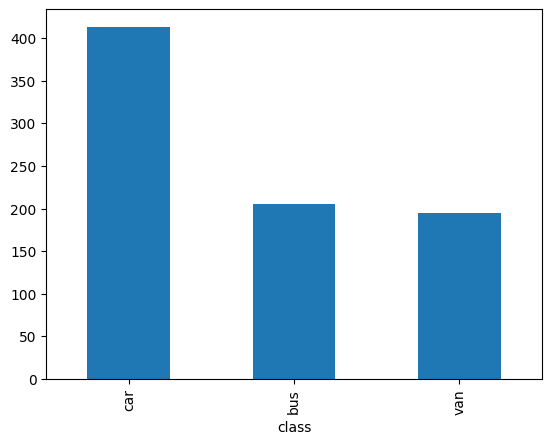

In [14]:
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_33201/1966965508.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(vehicle_df["class"]).hist(bins=300)


<Axes: >

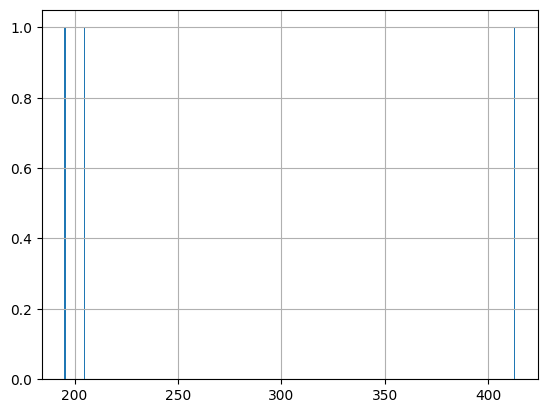

In [8]:
pd.value_counts(vehicle_df["class"]).hist(bins=300)

In [15]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [16]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
# go for any clustering methods. You can use zscore function to do this.

In [17]:
vehicle_df_1 = vehicle_df.drop("class", axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features by removing the mean and scaling to unit variance
# This does z score normalization by default so no need to use scipy zscore function
sc = StandardScaler()
X_standard = sc.fit_transform(vehicle_df_1)

In [19]:
print("Standardized Data:")
print(X_standard)

Standardized Data:
[[ 0.16323063  0.52040788  0.06066872 ...  0.37128716 -0.3218087
   0.17183708]
 [-0.32287376 -0.61912319  0.12406675 ...  0.14710858  0.00340009
   0.44231829]
 [ 1.2569655   0.84598818  1.51882349 ... -0.41333788 -0.1592043
   0.03659647]
 ...
 [ 1.5000177   1.49714879  1.20183332 ... -0.97378433 -0.3218087
   0.7127995 ]
 [-0.93050425 -1.43307395 -0.25632145 ...  1.38009078  0.16600449
  -0.09864413]
 [-1.05203035 -1.43307395 -1.01709784 ...  0.59546574 -0.4844131
  -0.77484716]]


## Average Method

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_df_average = linkage(X_standard, method="average", metric="euclidean")
Z_df_average.shape

(812, 4)

In [21]:
Z_df_average[:5, :]  # Display first 5 rows of the linkage matrix

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       [9.90000000e+01, 3.83000000e+02, 5.75992152e-01, 2.00000000e+00],
       [1.87000000e+02, 2.22000000e+02, 5.88087551e-01, 2.00000000e+00]])

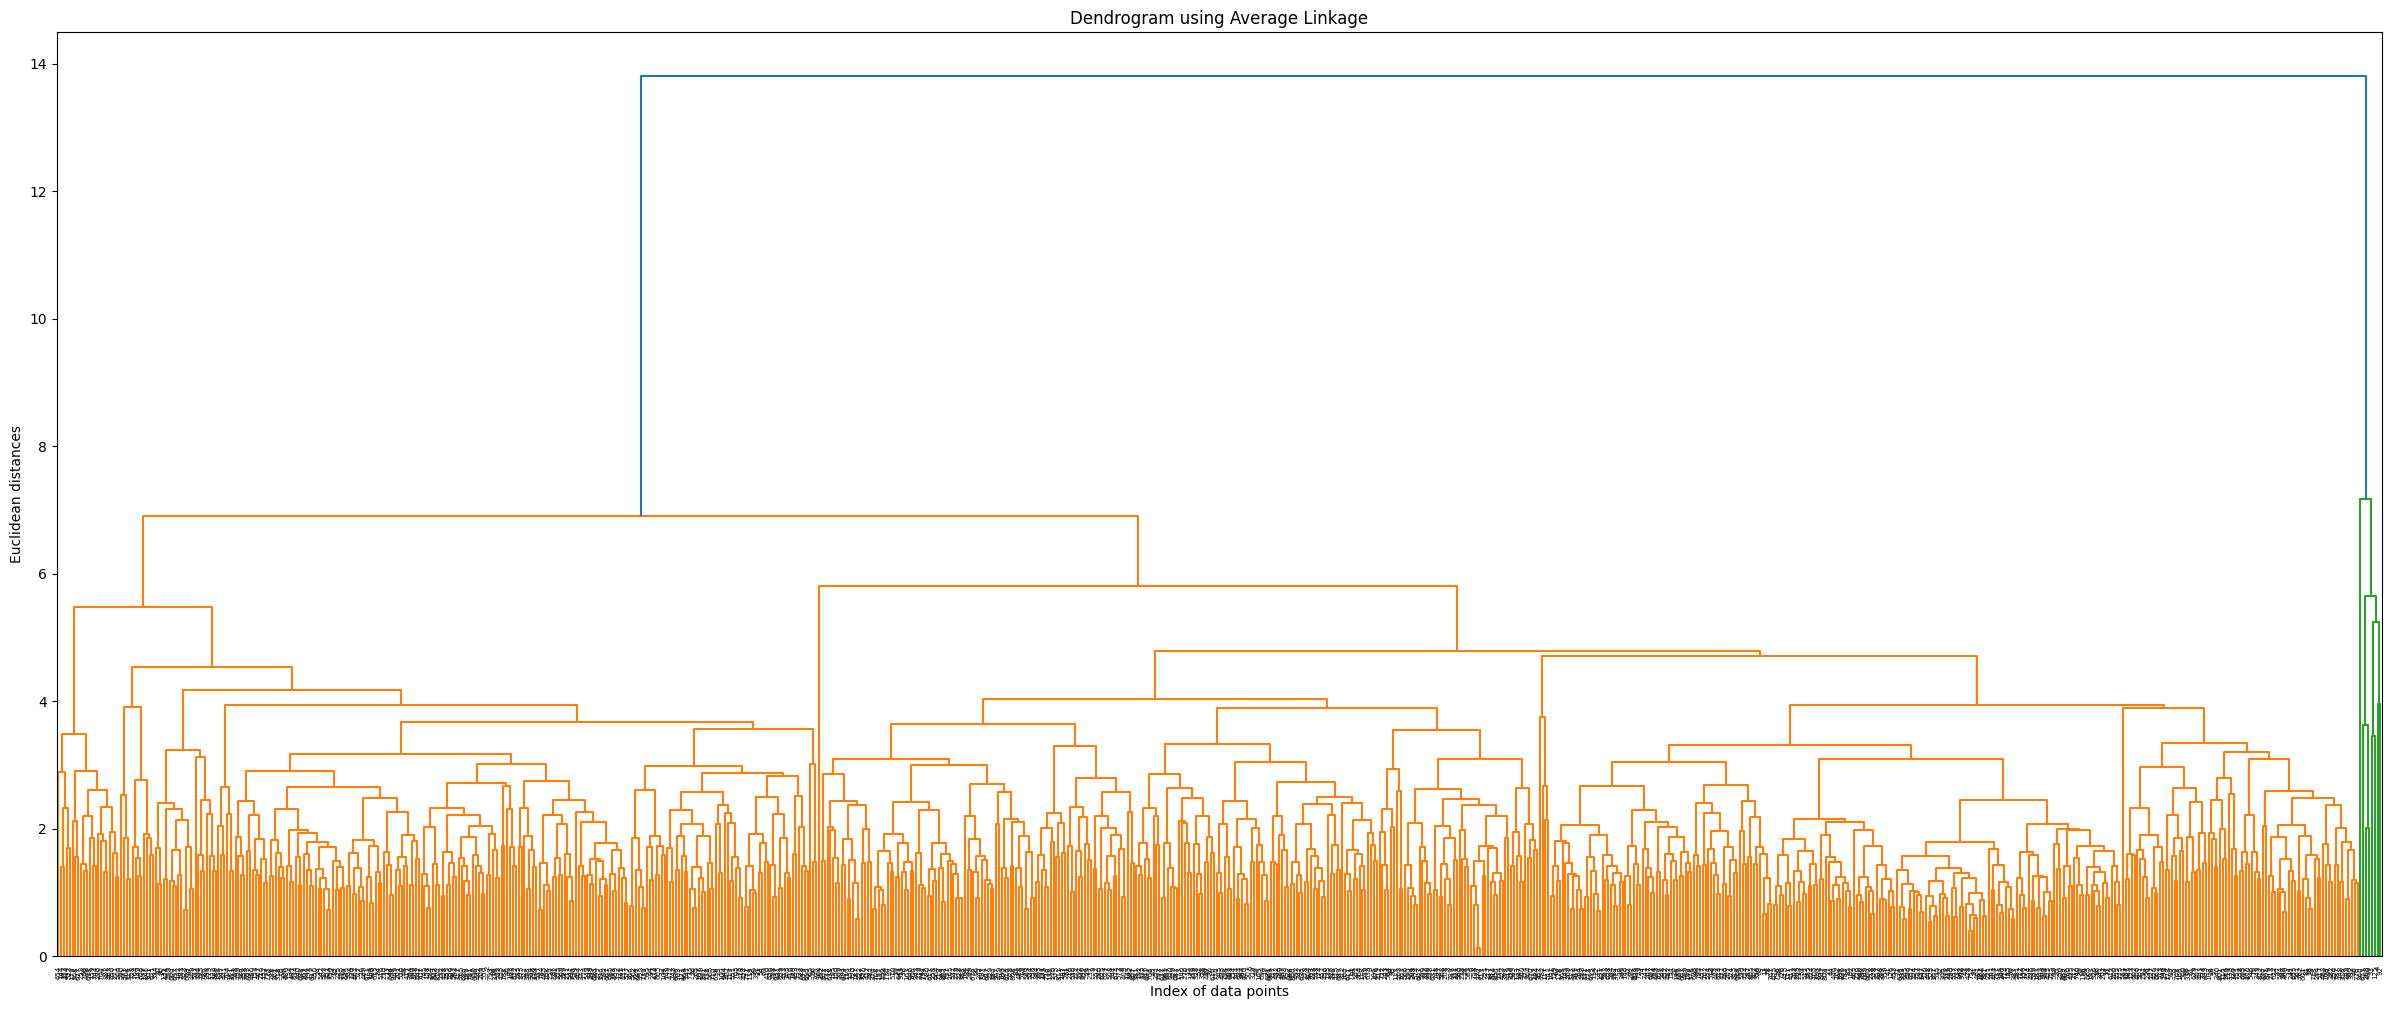

In [22]:
plt.figure(figsize=(30, 12))
dendrogram(Z_df_average)
plt.title("Dendrogram using Average Linkage")
plt.xlabel("Index of data points")
plt.ylabel("Euclidean distances")
plt.show()

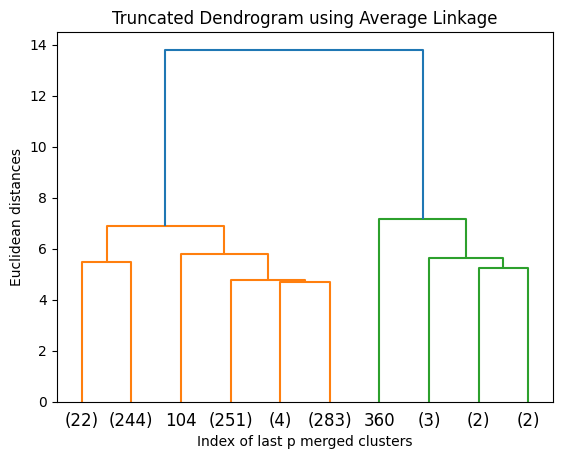

In [24]:
dendrogram(Z_df_average, truncate_mode="lastp", p=10)
plt.title("Truncated Dendrogram using Average Linkage")
plt.xlabel("Index of last p merged clusters")
plt.ylabel("Euclidean distances")
plt.show()

In [25]:
from scipy.cluster.hierarchy import fcluster

max_distance = 15  # Set a threshold distance to cut the dendrogram
hier_clusters_average = fcluster(Z_df_average, t=max_distance, criterion="distance")
hier_clusters_average

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
hier_clusters_average.shape

(813,)

In [29]:
len(set(hier_clusters_average))  # Number of unique clusters formed

1

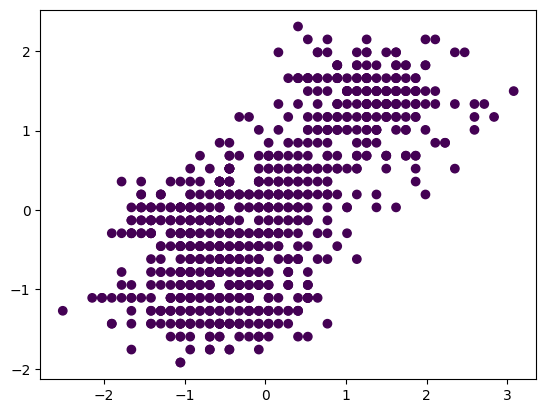

In [30]:
plt.scatter(X_standard[:, 0], X_standard[:, 1], c=hier_clusters_average)

## Ward Method

In [31]:
Z_df_ward = linkage(X_standard, method="ward", metric="euclidean")
Z_df_ward.shape

(812, 4)

In [32]:
Z_df_ward[:5, :]  # Display first 5 rows of the linkage matrix

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       [9.90000000e+01, 3.83000000e+02, 5.75992152e-01, 2.00000000e+00],
       [1.87000000e+02, 2.22000000e+02, 5.88087551e-01, 2.00000000e+00]])

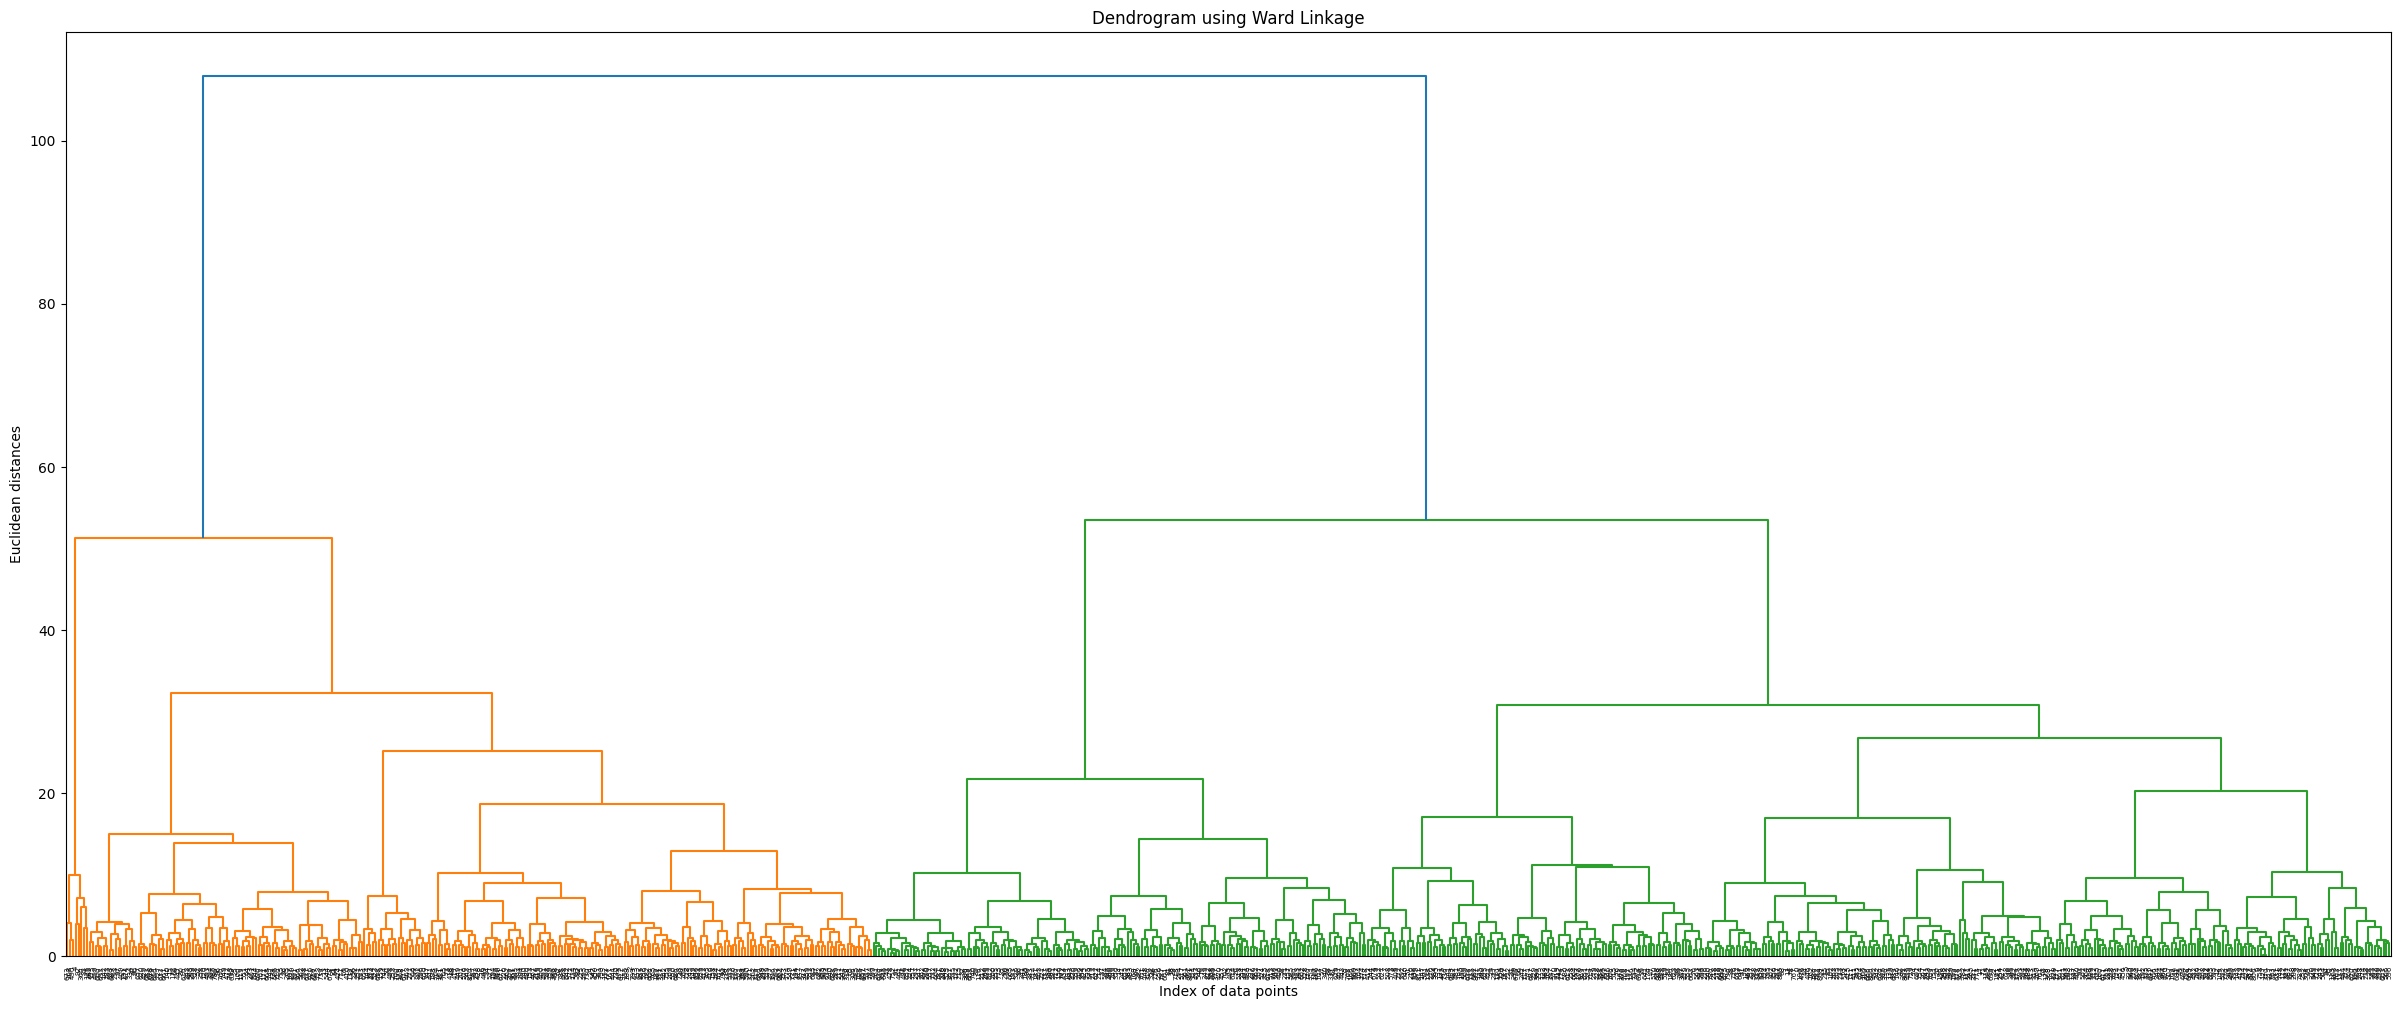

In [33]:
plt.figure(figsize=(30, 12))
dendrogram(Z_df_ward)
plt.title("Dendrogram using Ward Linkage")
plt.xlabel("Index of data points")
plt.ylabel("Euclidean distances")
plt.show()

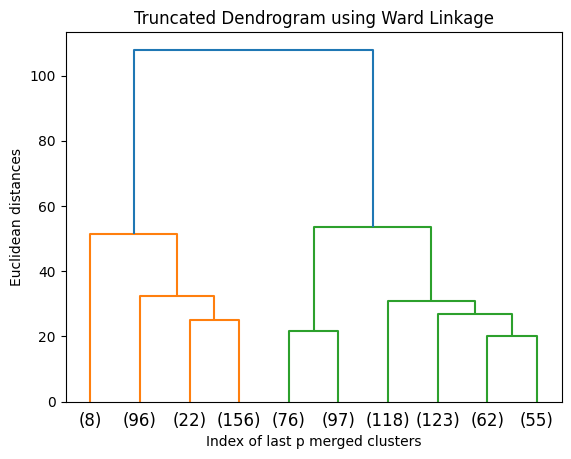

In [34]:
dendrogram(Z_df_ward, truncate_mode="lastp", p=10)
plt.title("Truncated Dendrogram using Ward Linkage")
plt.xlabel("Index of last p merged clusters")
plt.ylabel("Euclidean distances")
plt.show()

In [47]:
# max_distance = 5  # Set a threshold distance to cut the dendrogram
# max_distance = 15
max_distance = 20
hier_clusters_ward = fcluster(Z_df_ward, t=max_distance, criterion="distance")
hier_clusters_ward

array([ 8,  8,  4, 10,  1,  9, 10,  7,  7,  7,  8,  8,  9,  2,  6,  2,  4,
        8,  6,  9,  8,  2,  8,  6,  4,  2,  6,  8, 10,  7,  2,  7,  5,  1,
        4,  5,  2,  6,  8,  7,  4,  8,  8,  5,  8, 10,  6,  7,  4,  9,  3,
        7,  2,  8,  2,  6,  2,  6,  6,  5,  2,  6,  4,  8,  2,  4,  7,  6,
        8,  2,  7,  5,  8,  4,  8,  6,  7,  3,  8,  6,  2,  6,  4,  7,  4,
        8,  5,  4,  6,  5,  2,  5,  1,  9, 10, 10,  2,  2,  7,  5,  2,  8,
        8,  6,  6,  8,  8,  2,  4,  9,  6,  8, 10, 10,  8,  8,  5,  8,  9,
        2,  2,  7,  7,  6,  4,  1,  8, 10,  6,  8,  7,  2,  5,  9,  4,  8,
        7, 10,  7,  2,  2,  7,  2, 10,  3,  7,  8,  7,  6,  4,  7,  8,  4,
        4,  7,  4,  5,  6,  4,  3,  9,  4,  8,  7,  7,  7,  6,  4,  6,  9,
        6,  2,  2,  7,  9,  4,  7,  9,  8,  3,  7,  5,  4,  5,  5,  5,  8,
        7,  4,  4, 10,  8,  9,  5,  4,  7,  8,  7,  4,  8,  5,  4,  8, 10,
        4,  8,  5,  6, 10,  4,  7,  4,  5,  6,  6,  5,  4, 10,  8,  7,  4,
        5,  7,  9,  5,  4

In [48]:
hier_clusters_ward.shape

(813,)

In [49]:
len(set(hier_clusters_ward))  # Number of unique clusters formed

10

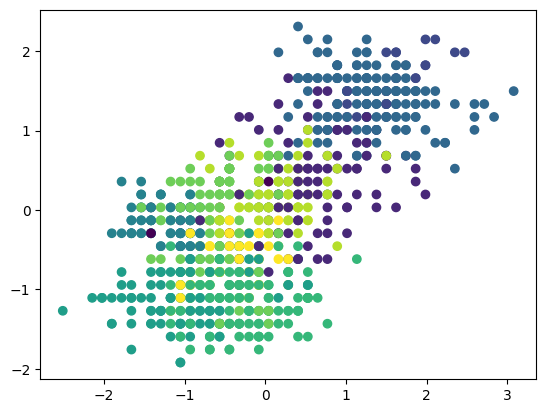

In [51]:
plt.scatter(X_standard[:, 0], X_standard[:, 1], c=hier_clusters_ward)

## Complete Method

In [52]:
Z_df_complete = linkage(X_standard, method="complete", metric="euclidean")
Z_df_complete.shape

(812, 4)

In [53]:
Z_df_complete[:5, :]  # Display first 5 rows of the linkage matrix

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       [9.90000000e+01, 3.83000000e+02, 5.75992152e-01, 2.00000000e+00],
       [1.87000000e+02, 2.22000000e+02, 5.88087551e-01, 2.00000000e+00]])

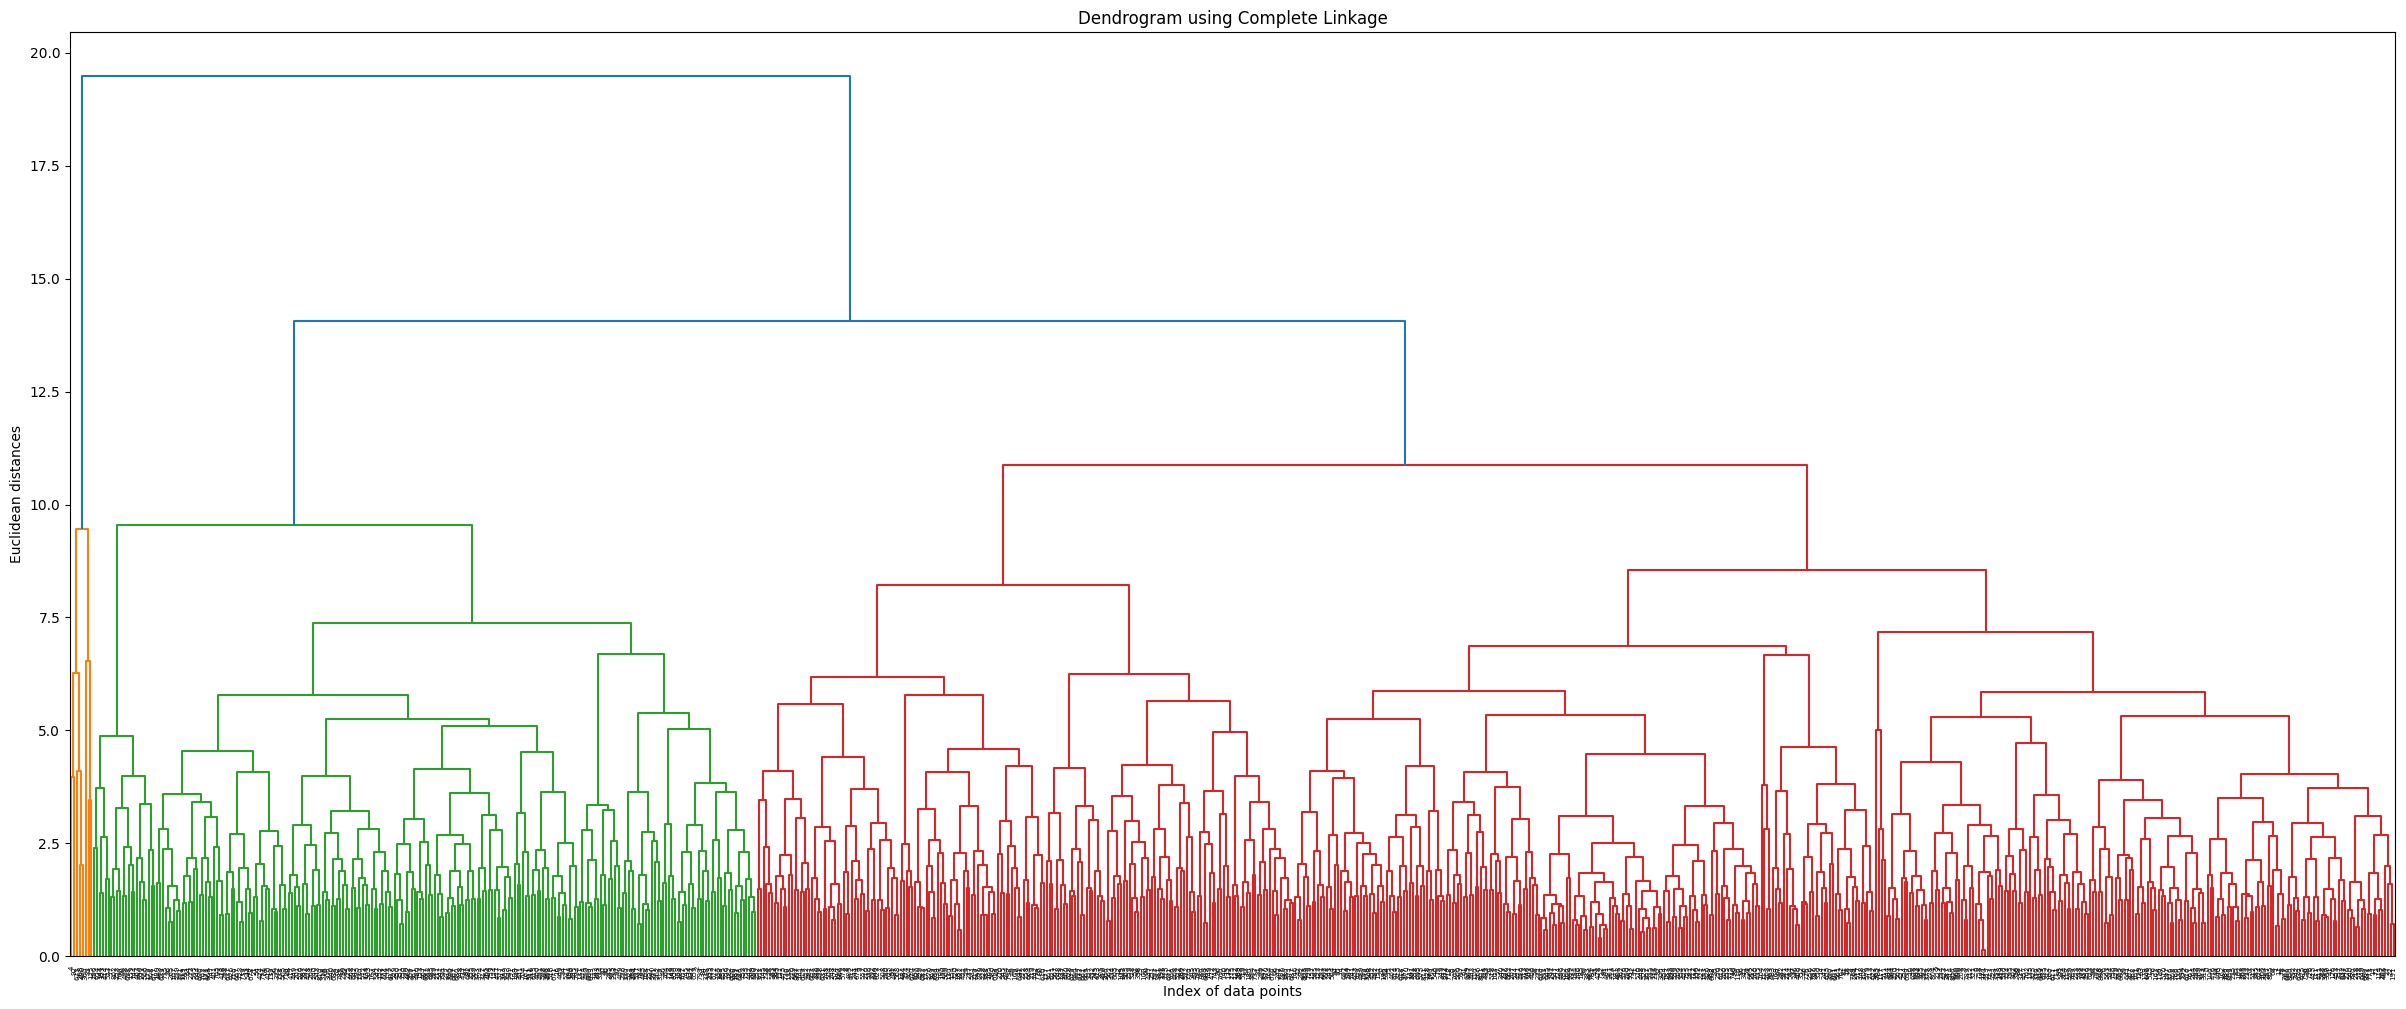

In [55]:
plt.figure(figsize=(30, 12))
dendrogram(Z_df_complete)
plt.title("Dendrogram using Complete Linkage")
plt.xlabel("Index of data points")
plt.ylabel("Euclidean distances")
plt.show()

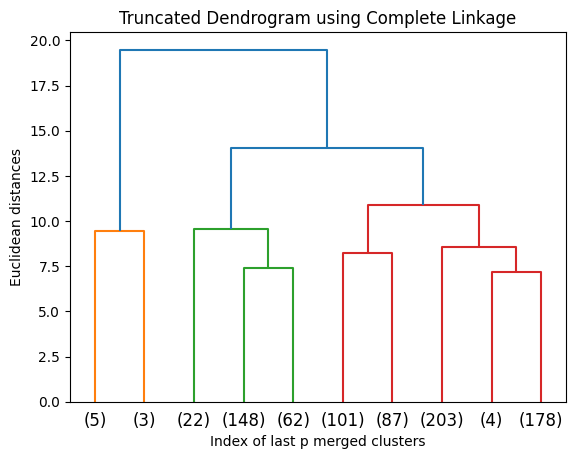

In [56]:
dendrogram(Z_df_complete, truncate_mode="lastp", p=10)
plt.title("Truncated Dendrogram using Complete Linkage")
plt.xlabel("Index of last p merged clusters")
plt.ylabel("Euclidean distances")
plt.show()

In [61]:
# max_distance = 5  # Set a threshold distance to cut the dendrogram
max_distance = 15
# max_distance = 20
hier_clusters_complete = fcluster(Z_df_complete, t=max_distance, criterion="distance")
hier_clusters_complete

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [62]:
hier_clusters_complete.shape

(813,)

In [63]:
len(set(hier_clusters_complete))  # Number of unique clusters formed

2

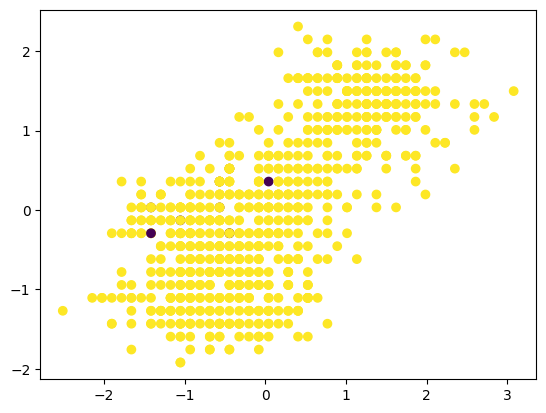

In [64]:
plt.scatter(X_standard[:, 0], X_standard[:, 1], c=hier_clusters_complete)

## Hierarchical Clustering — Quick Guide

- **Purpose:** Builds a tree (dendrogram) showing how points merge into clusters at increasing dissimilarity.
- **Read the dendrogram:** leaves = items; branch tops = merge points; height (y) = merge distance (higher = more different).
- **Cutting the tree:** draw a horizontal line at height h → every vertical branch that crosses the line becomes a cluster.
- **Where to cut:** pick a height just below a large vertical gap (big jump in merge heights) to get well-separated clusters.
- **What to look for:** long branches before a merge → cohesive, distinct clusters; many short merges → weak/no clear hierarchy.
- **Quick checks after cutting:** print cluster sizes, compute `silhouette_score`, and view clusters in PCA space.
- **One-line takeaway:** the dendrogram maps cluster similarity across all scales — cut below big jumps to get stable, interpretable clusters.


=== Ward linkage ===
Suggested cut height = 80.7215
Number of clusters (suggested): 2
Cluster sizes: {1: np.int64(282), 2: np.int64(531)}


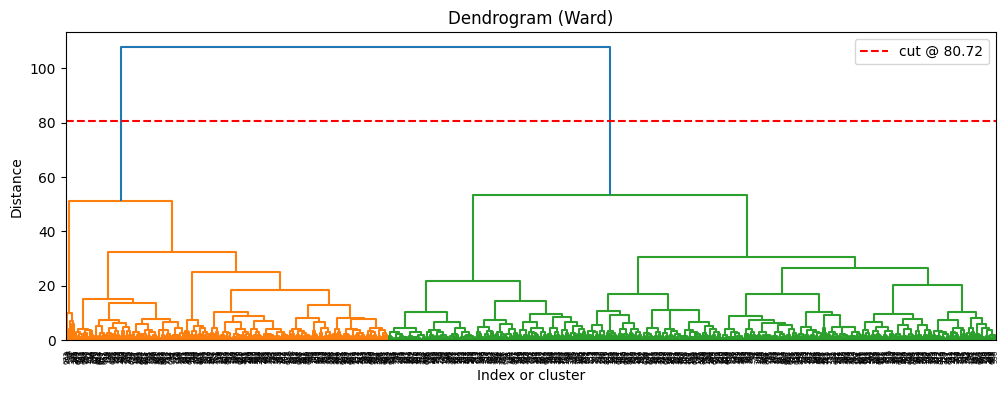

Silhouette score (suggested partition): 0.3821


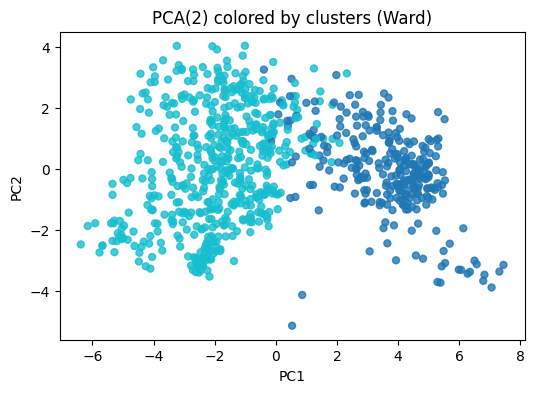


=== Complete linkage ===
Suggested cut height = 16.7746
Number of clusters (suggested): 2
Cluster sizes: {1: np.int64(8), 2: np.int64(805)}


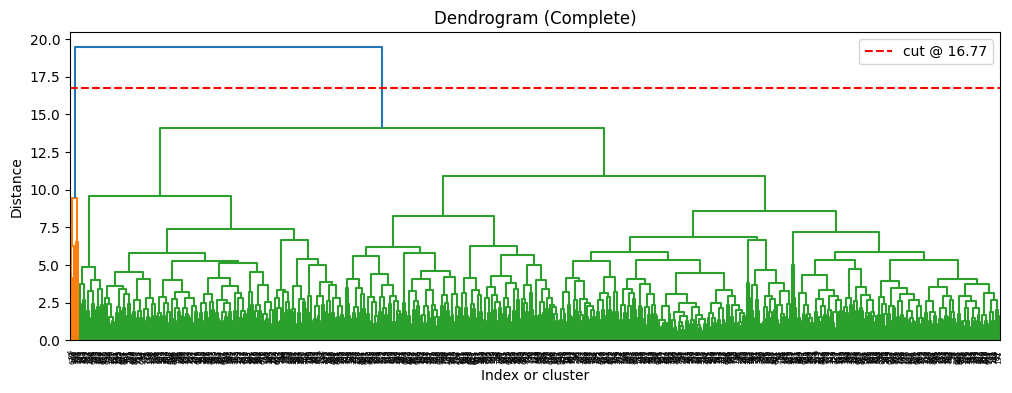

Silhouette score (suggested partition): 0.6141


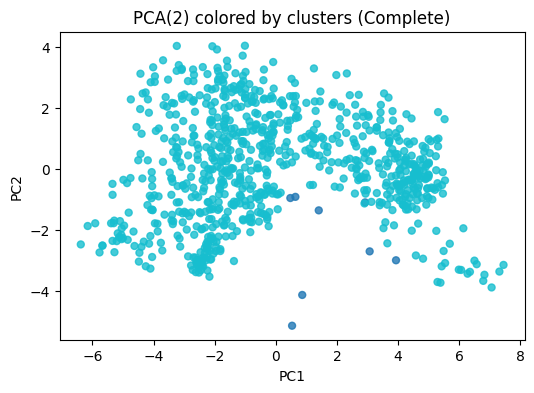


=== Average linkage ===
Suggested cut height = 10.4870
Number of clusters (suggested): 2
Cluster sizes: {1: np.int64(805), 2: np.int64(8)}


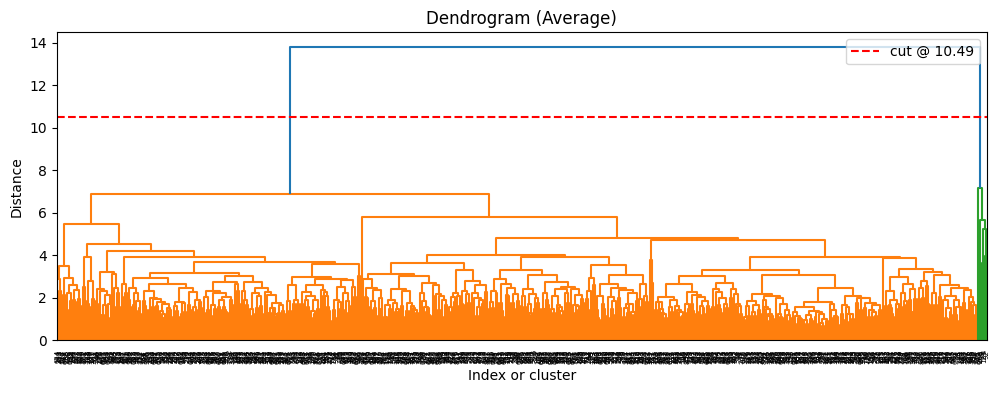

Silhouette score (suggested partition): 0.6141


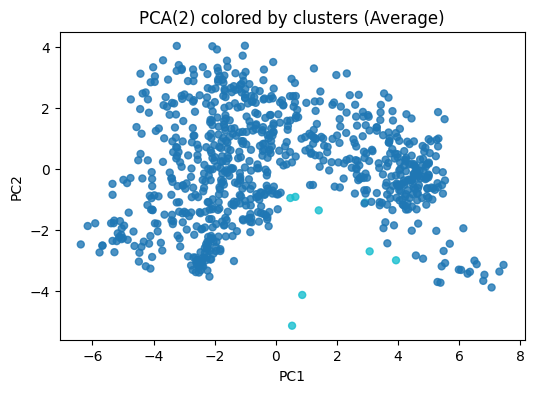

In [68]:
# Suggested cut, cluster sizes and silhouette score for Ward/Complete/Average
import numpy as np
from scipy.cluster.hierarchy import fcluster, dendrogram
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

linkage_list = [('Ward', 'Z_df_ward'), ('Complete', 'Z_df_complete'), ('Average', 'Z_df_average')]
found_any = False
for label, varname in linkage_list:
    if varname not in globals():
        print(f'{label}: linkage matrix {varname} not found; skipping.')
        continue
    found_any = True
    Z = globals()[varname]
    print(f'\n=== {label} linkage ===')
    # distances are in the 3rd column
    dists = np.sort(Z[:, 2])
    if len(dists) < 2:
        suggested_height = float(dists[-1]) if len(dists) else 0.0
    else:
        gaps = np.diff(dists)
        idx = int(np.argmax(gaps))
        # choose midpoint between the two values around the largest gap
        suggested_height = float((dists[idx] + dists[idx+1]) / 2.0)
    print(f'Suggested cut height = {suggested_height:.4f}')

    # form clusters
    clusters = fcluster(Z, t=suggested_height, criterion='distance')
    n_clusters = len(np.unique(clusters))
    print('Number of clusters (suggested):', n_clusters)
    sizes = np.bincount(clusters)[1:]
    print('Cluster sizes:', dict(enumerate(sizes, start=1)))

    # dendrogram
    plt.figure(figsize=(12, 4))
    dendrogram(Z, color_threshold=suggested_height)
    plt.axhline(suggested_height, color='r', linestyle='--', label=f'cut @ {suggested_height:.2f}')
    plt.title(f'Dendrogram ({label})')
    plt.xlabel('Index or cluster')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

    # silhouette + PCA(2) if standardized data exists
    if 'X_standard' in globals():
        X = X_standard
    else:
        X = None

    if X is not None:
        try:
            score = silhouette_score(X, clusters)
            print('Silhouette score (suggested partition):', round(score, 4))
        except Exception as e:
            print('Could not compute silhouette score:', e)

        pca = PCA(n_components=2, random_state=0)
        X2 = pca.fit_transform(X)
        plt.figure(figsize=(6, 4))
        plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='tab10', s=25, alpha=0.8)
        plt.title(f'PCA(2) colored by clusters ({label})')
        plt.xlabel('PC1'); plt.ylabel('PC2')
        plt.show()
    else:
        print('Standardized data not found; skipping silhouette and PCA plot.')

if not found_any:
    raise RuntimeError('No linkage matrices found among Z_df_ward, Z_df_complete, Z_df_average.')
    print('Standardized data not found; skipping silhouette and PCA plot.')

**Summary:** the cell iterates Ward/Complete/Average linkages (if present), finds a reasonable cut by locating the largest jump in merge distances, assigns clusters at that cut, prints sizes and cluster counts, draws the dendrogram with a cut line, and—if the numeric matrix is available—reports a silhouette score and a PCA(2) scatter for quick visual validation.

**Silhouette value**: This is one of the metrics used to measure the success of clustering. It ranges from –1 to +1, and a higher value is better. It measures how a
data point is similar to other data points in its own cluster as compared to other
clusters.

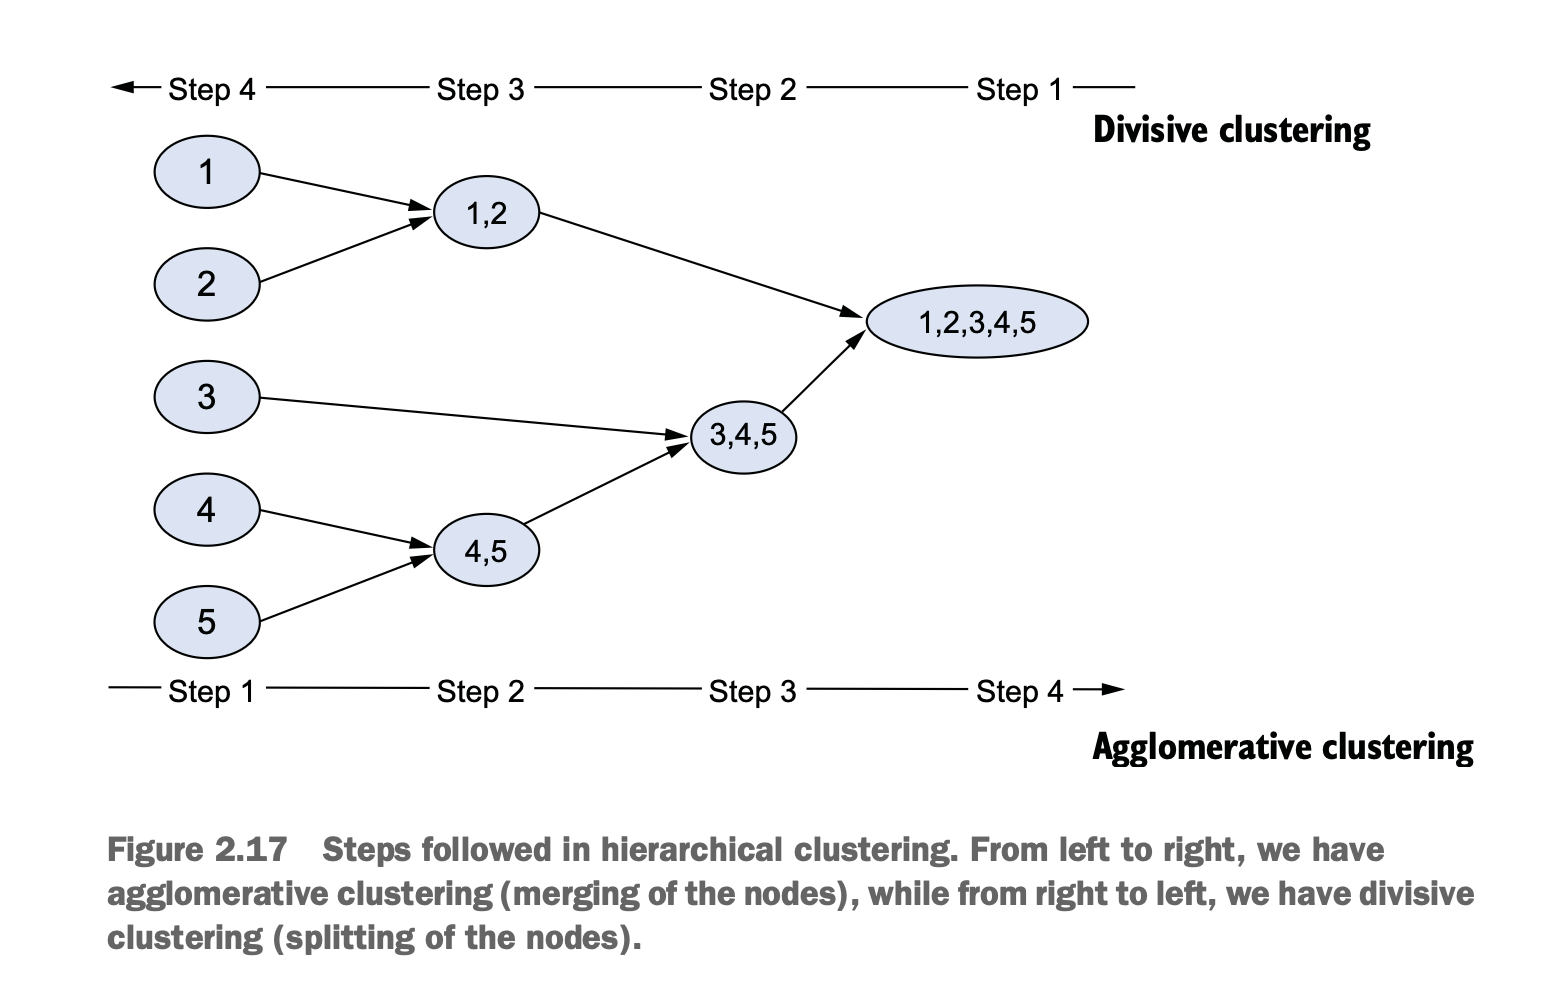

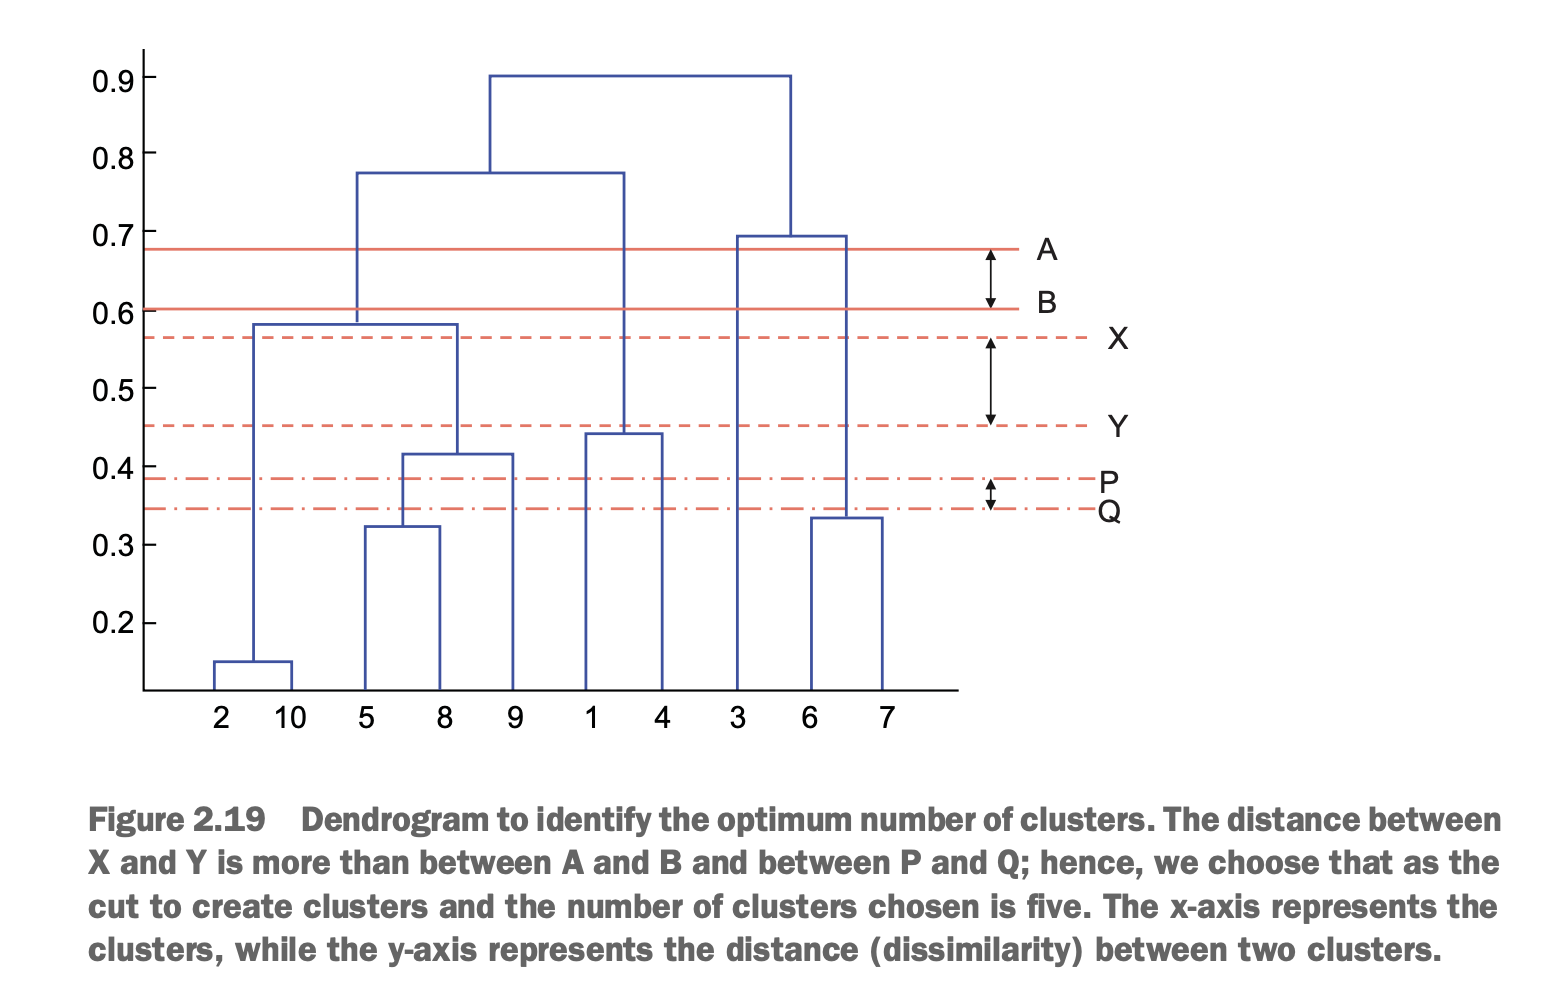

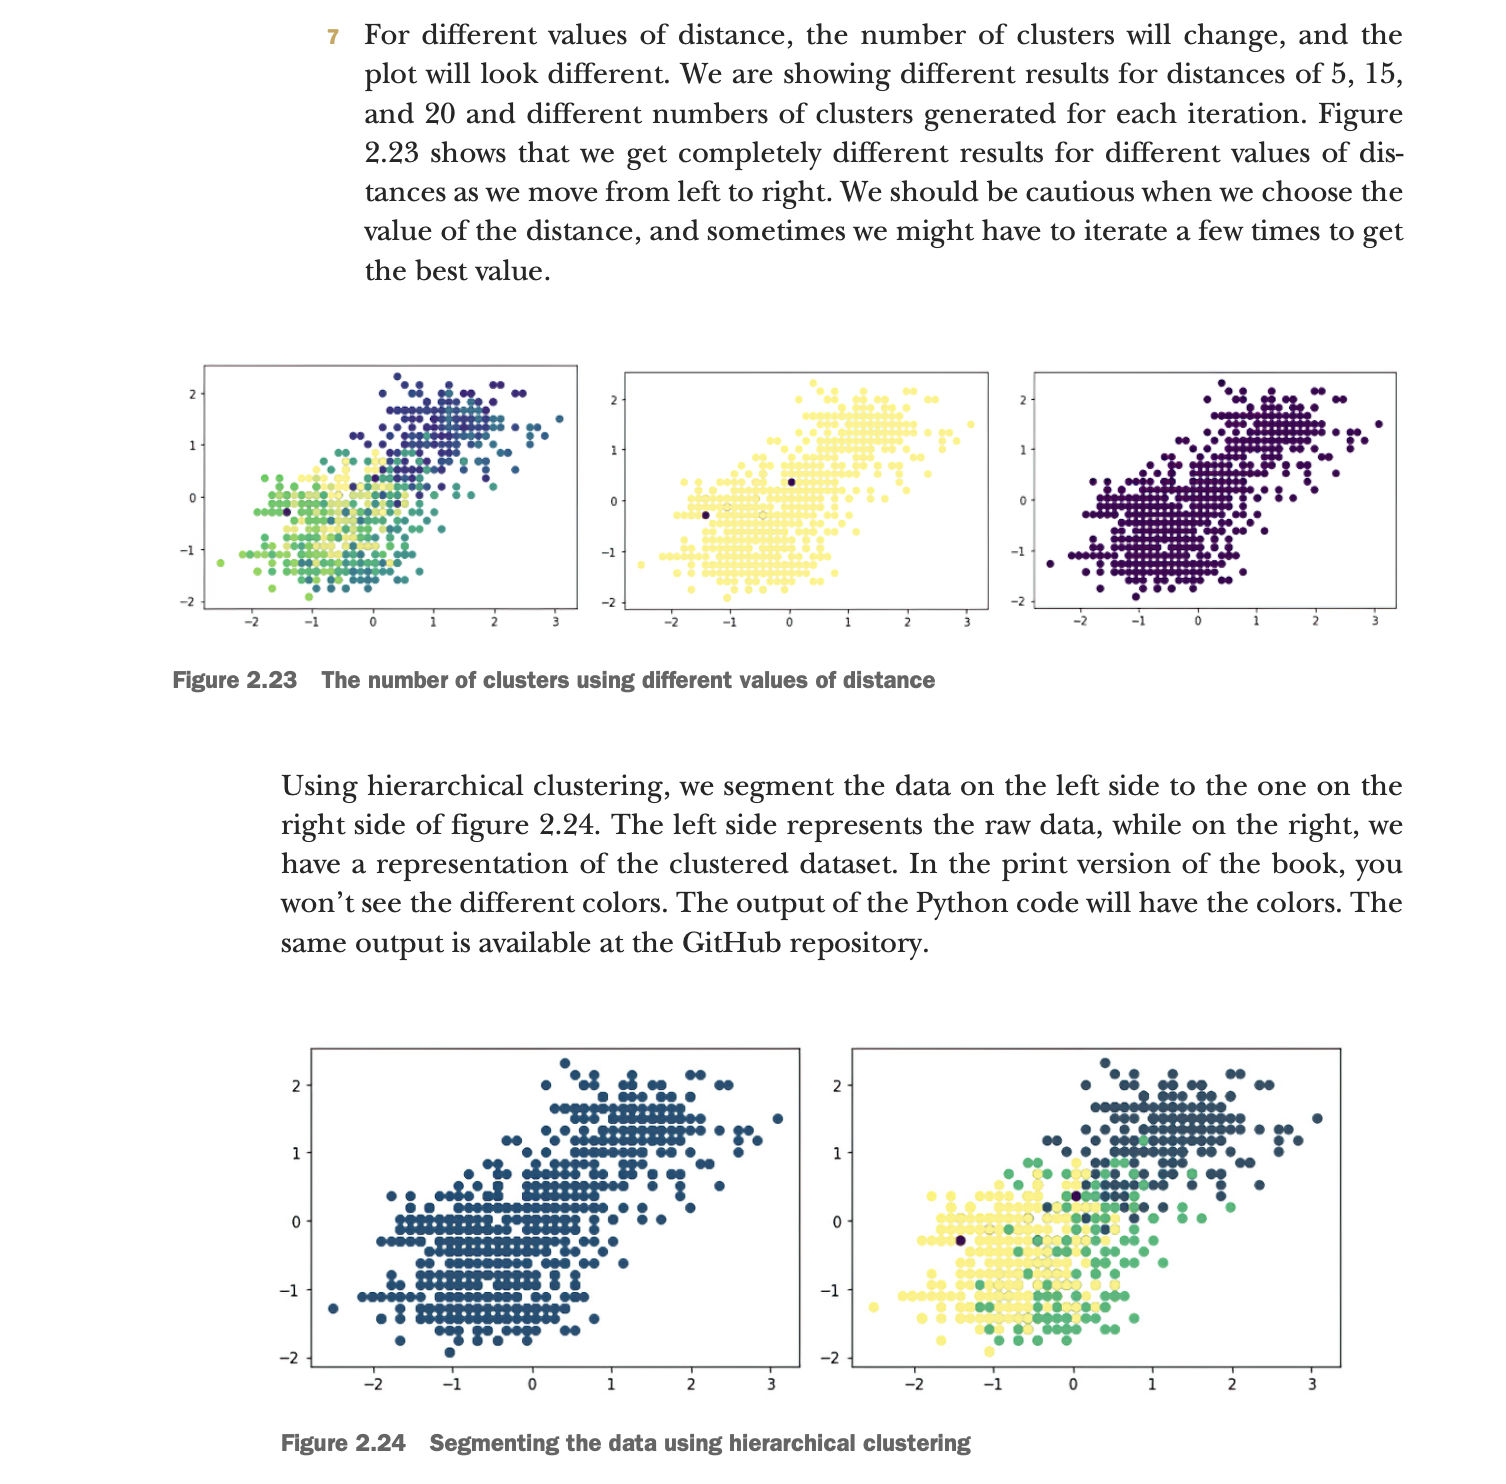